## Boosting: gradient boosting


In [36]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.optimize import fmin

import matplotlib.pyplot as plt
%matplotlib inline

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

Let's generate a toy dataset for classification.

In [589]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
y = y * 2 - 1 # for LogLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task:
1. Implement adaboost (or gradient boosting) algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;


2. **Plot the decision boundary** on a $2$-d grid; 



3. Estimate the accuracy **score** on the test dataset, as well as other classification metrics

In [600]:
def logloss(y, predictions):
    loss = np.sum(np.log(1.+np.exp(-y*predictions)))
    return loss

def dlogloss(y, predictions):
    return -y/(1.+np.exp(predictions*y))


class GradientBoosting():
    def __init__(self, n_estimator=100, learning_rate=0.1, max_depth=3, random_state=23):
        self.n_estimator = n_estimator
        self.l_r = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.loss = []

    def fit(self, X_train, y_train):
        """
        """
        y_pred = np.ones(len(y_train)) * np.mean(y_train)
        y_pred = np.zeros(len(y_train))
        for tree_ind in range(self.n_estimator):
            y_residual = -dlogloss(y_train, y_pred)
            # y_residual = y_train - y_pred
            clf = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            clf.fit(X_train, y_residual)
            self.models.append(clf)
            y_pred += clf.predict(X_train)
            self.loss.append(logloss(y_train, y_pred))
        return self

    def predict_proba(self, X_test):
        y_pred = np.zeros(len(X_test))
        for clf in self.models:
            y_pred += clf.predict(X_test)
        return y_pred

    def predict(self, X_test):
        # Turn into probability distribution
        y_pred = self.predict_proba(X_test)
        return (y_pred > 0).astype(int)


Please refer to mlxtend by yourself. It's a nice library to plot the images

In [603]:
gbm_clf = clf=GradientBoosting(random_state=23)
gbm_clf.fit(X_train, y_train)

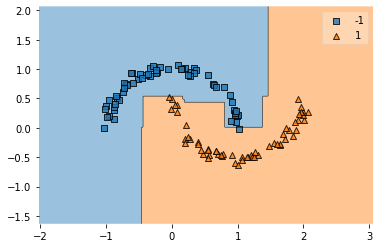

In [604]:
from mlxtend.plotting import plot_decision_regions
# 0 means 1 due to issue in mlextend
plot_decision_regions(X_test, y_test, clf=gbm_clf)
plt.show()

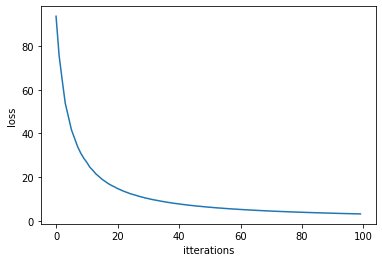

In [609]:
plt.plot(gbm_clf.loss)
plt.xlabel('itterations')
plt.ylabel('loss');